In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from ipywidgets import interact, fixed

%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']  # 解决中文显示问题
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

In [28]:
# 1. 加载数据文件 (假设文件在当前目录)
axis_data = pd.read_csv('../datas/axisdata.csv')
camera_data = pd.read_csv('../datas/camera_data.csv', parse_dates=[0,1])
cy_time_data = pd.read_csv('../datas/cytime.csv')
warnlog_data = pd.read_csv('../datas/warnlog.csv', encoding='gbk')
# 补充另外两个文件的加载 (根据实际文件名调整)
# file4 = pd.read_csv('your_file4.csv')
# file5 = pd.read_csv('your_file5.csv')

In [4]:
# 2. 数据探索
def explore_data(df, name):
    print(f"\n{name} 数据概况:")
    print("前5行数据:")
    print(df.head())
    print("\n数据统计信息:")
    print(df.describe())
    print("\n数据列信息:")
    print(df.info())
    print("\n缺失值统计:")
    print(df.isnull().sum())
    
    # 数值列分布可视化
    num_cols = df.select_dtypes(include=[np.number]).columns
    if len(num_cols) > 0:
        plt.figure(figsize=(12, 6))
        df[num_cols].hist(bins=20)
        plt.suptitle(f'{name} - 数值分布', y=1.02)
        plt.tight_layout()
        plt.savefig(f'{name}_distribution.png', bbox_inches='tight')
        plt.close()

# 执行数据探索
# explore_data(axis_data, 'axis_data')
# explore_data(camera_data, 'camera_data')
# explore_data(cy_time_data, 'cy_time_data')

Text(0.5, 1.0, 'axis_data 相关性热图')

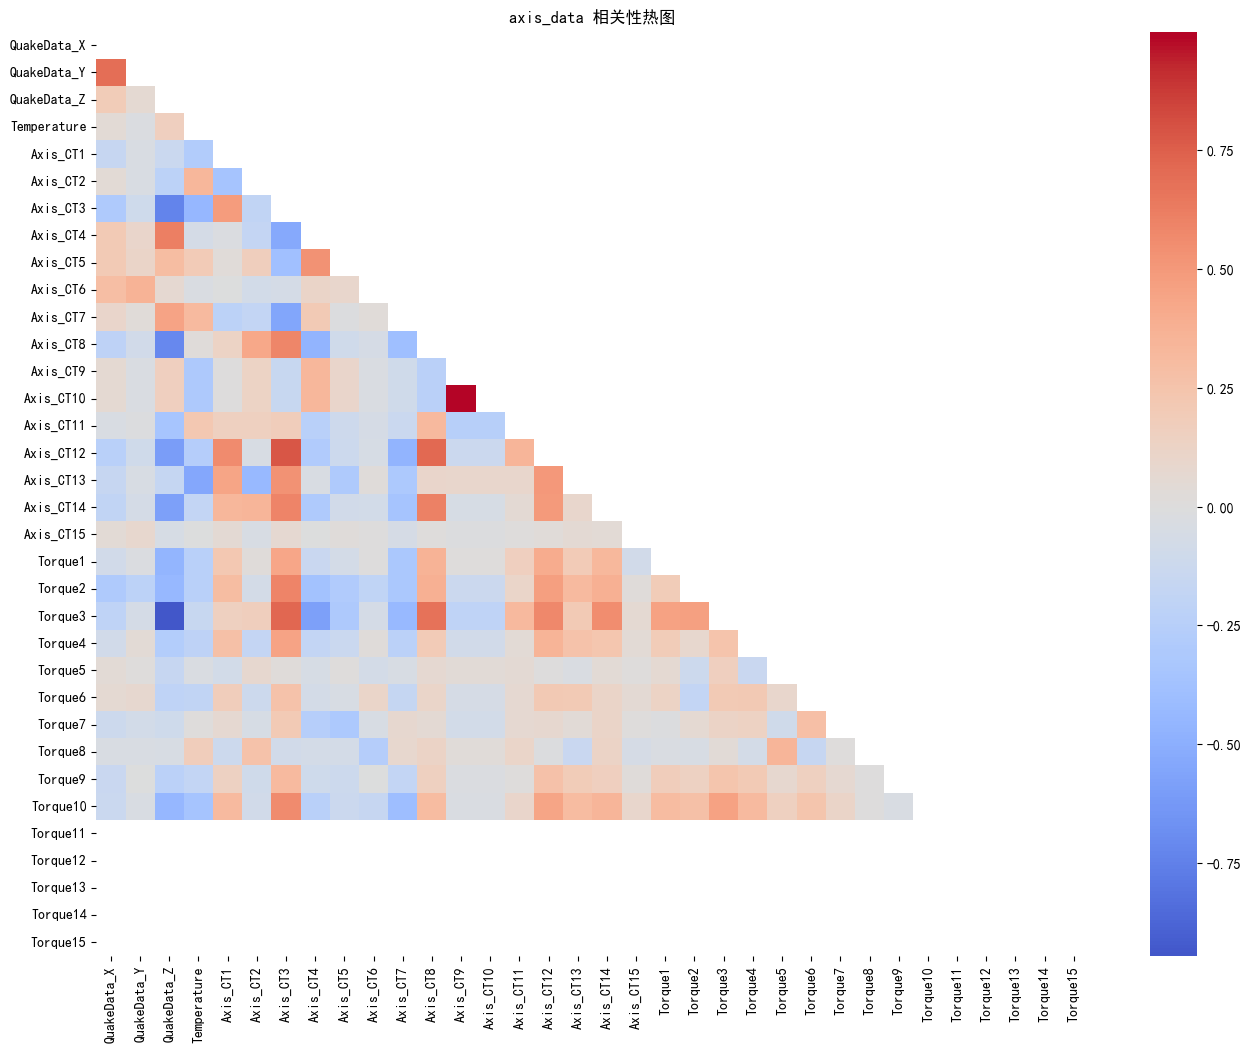

In [5]:
# 3. 相关性分析
# 轴数据分析
plt.figure(figsize=(16, 12))
corr = axis_data[axis_data.columns[1:]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=False, cmap='coolwarm', center=0)
plt.title('axis_data 相关性热图')

Text(0.5, 1.0, 'cy_time 相关性热图')

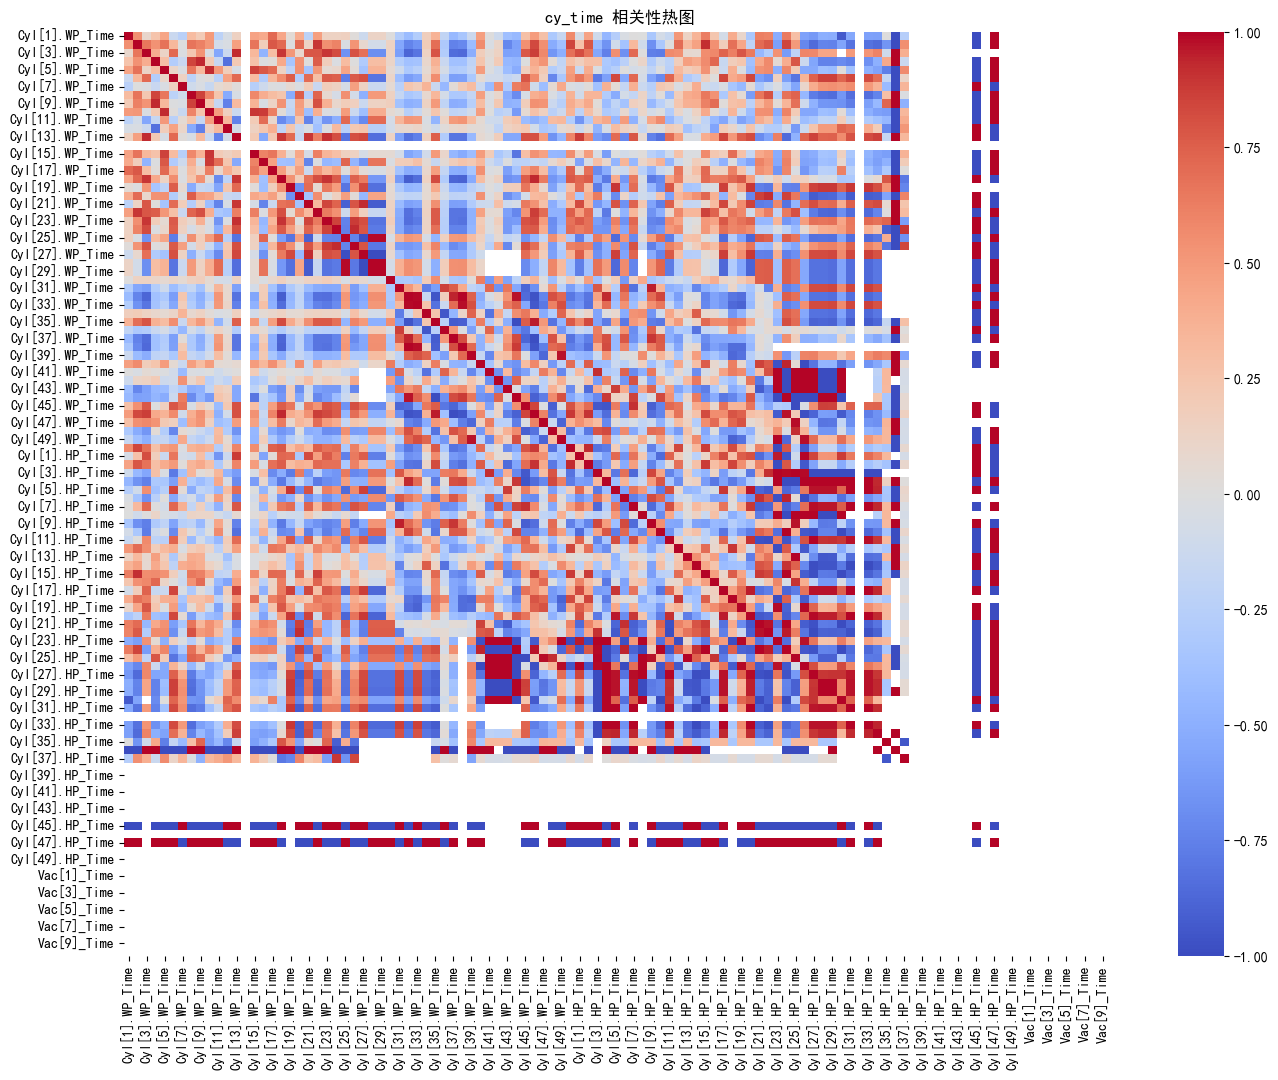

In [6]:
# 时间序列数据分析 (cy_time)
plt.figure(figsize=(16, 12))
sns.heatmap(cy_time_data[cy_time_data.columns[1:]].corr(), annot=False, cmap='coolwarm')
plt.title('cy_time 相关性热图')

In [21]:
cy_time_data

,time,Cyl[1].WP_Time,Cyl[2].WP_Time,Cyl[3].WP_Time,Cyl[4].WP_Time,Cyl[5].WP_Time,Cyl[6].WP_Time,Cyl[7].WP_Time,Cyl[8].WP_Time,Cyl[9].WP_Time,...,Vac[1]_Time,Vac[2]_Time,Vac[3]_Time,Vac[4]_Time,Vac[5]_Time,Vac[6]_Time,Vac[7]_Time,Vac[8]_Time,Vac[9]_Time,Vac[10]_Time
0,00:50:23 823,0.62913,0.92000,0.62500,0.40500,0.18735,0.83300,0.15800,0.90000,0.42400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01:50:23 787,0.62913,0.92000,0.62500,0.40500,0.18735,0.83300,0.15800,0.90000,0.42400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02:50:23 721,0.62913,0.92000,0.62500,0.40500,0.18735,0.83300,0.15800,0.90000,0.42400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,03:50:23 600,0.62913,0.92000,0.62500,0.40500,0.18735,0.83300,0.15800,0.90000,0.42400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,04:50:23 551,0.62913,0.92000,0.62500,0.40500,0.18735,0.83300,0.15800,0.90000,0.42400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,05:50:23 528,0.62913,0.92000,0.62500,0.40500,0.18735,0.83300,0.15800,0.90000,0.42400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,06:50:23 450,0.62913,0.92000,0.62500,0.40500,0.18735,0.83300,0.15800,0.90000,0.42400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,07:50:23 381,0.62913,0.92000,0.62500,0.40500,0.18735,0.83300,0.15800,0.90000,0.42400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,08:50:23 369,0.62927,0.92400,0.62500,0.41700,0.18771,0.81000,0.15300,0.98100,0.43100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,09:50:23 305,0.62919,0.92400,0.62500,0.41700,0.18772,0.81000,0.15300,0.98100,0.43100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 4. 文件间关联性分析
# 将时间列转换为统一格式
axis_data['time'] = pd.to_datetime(axis_data['time'], format='%H:%M:%S').dt.time
# cy_time_data['time'] = cy_time_data['time'].str[:8]
cy_time_data['time'] = pd.to_datetime(cy_time_data['time'], format='%H:%M:%S').dt.time

# 可视化不同文件的时间序列数据
plt.figure(figsize=(15, 10))
plt.subplot(211)
axis_data.iloc[:, 1:].plot(alpha=0.6)
plt.title('axis_data 时间序列')
plt.legend().remove()

plt.subplot(212)
cy_time_data.iloc[:, 2:].plot(alpha=0.6)
plt.title('cy_time 时间序列')
plt.legend().remove()
plt.tight_layout()

In [ ]:
# 5. 报警事件与轴数据关联分析
# 获取报警开始时间
alarm_times = pd.to_datetime(warnlog_data['开始时间']).dt.time

# 在轴数据中标记报警事件
axis_data['Alarm'] = axis_data['time'].isin(alarm_times).astype(int)

In [ ]:
time_threshold = pd.Timedelta(seconds=10)  # 时间窗口阈值
# 报警期间的特征变化
alarm_features = axis_data.groupby('Alarm').mean().T.reset_index()

plt.figure(figsize=(14, 8))
plt.subplot(121)
sns.barplot(x='Alarm', y=0, data=alarm_features.iloc[1:51], color='skyblue', alpha=0.7)
plt.title('报警时气缸特征变化')
plt.ylabel('平均值')

plt.subplot(122)
sns.barplot(x='Alarm', y=0, data=alarm_features.iloc[51:], color='salmon', alpha=0.7)
plt.title('报警时真空特征变化')
plt.ylabel('平均值')
plt.tight_layout()

In [ ]:

# 6. 温度和振动分析
plt.figure(figsize=(12, 6))
sns.lineplot(data=cy_time_data, x='time', y='Temperature', label='温度')
plt.title('温度随时间变化')
plt.xticks(rotation=45)
plt.savefig('temperature_trend.png', bbox_inches='tight')
plt.close()

plt.figure(figsize=(12, 6))
for col in ['QuakeData_X', 'QuakeData_Y', 'QuakeData_Z']:
    sns.lineplot(data=cy_time_data, x='time', y=col, label=col)
plt.title('振动传感器数据')
plt.xticks(rotation=45)
plt.savefig('vibration_data.png', bbox_inches='tight')
plt.close()

# 7. 特征工程与深度分析
# 添加时间特征
axis_data['Hour'] = pd.to_datetime(axis_data['Time'], format='%H:%M:%S').dt.hour
cy_time_data['Hour'] = pd.to_datetime(cy_time_data['time'], format='%H:%M:%S').dt.hour

# 按小时聚合分析
hourly_axis = axis_data.groupby('Hour').mean().iloc[:, :-2]
hourly_cy = cy_time_data.groupby('Hour').mean().iloc[:, :-1]

plt.figure(figsize=(16, 12))
plt.subplot(211)
sns.heatmap(hourly_axis.T, cmap='viridis')
plt.title('气缸数据小时平均')

plt.subplot(212)
sns.heatmap(hourly_cy.T.iloc[:20], cmap='coolwarm')
plt.title('传感器数据小时平均')
plt.tight_layout()
plt.savefig('hourly_averages.png', bbox_inches='tight')
plt.close()

print("分析完成! 所有图表已保存为图像文件")